In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#defining folder path
path = r'/Users/daniel/Library/CloudStorage/OneDrive-Persönlich/00 Synology/01 Dokumente/2023 Docs/99 CareerFoundry/04 Python/00 Instacart'

In [3]:
# importing pickle
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_v3.pkl'))

## Bar Charts

<Axes: >

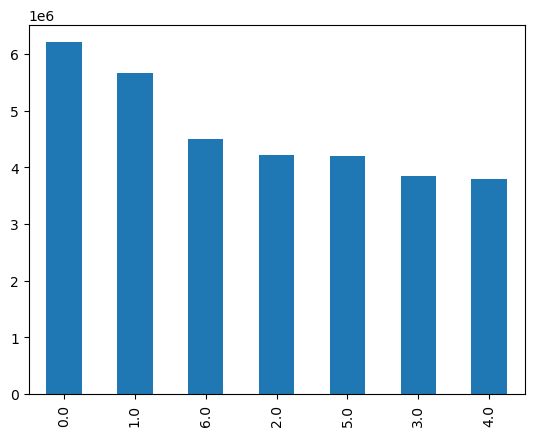

In [4]:
# plotting orders as bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

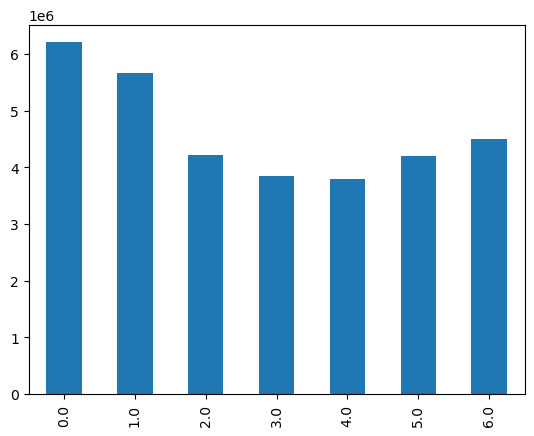

In [7]:
# sort by index order
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [8]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

0.0    6209808
1.0    5665951
2.0    4217868
3.0    3844175
4.0    3787263
5.0    4209603
6.0    4500391
Name: orders_day_of_week, dtype: int64

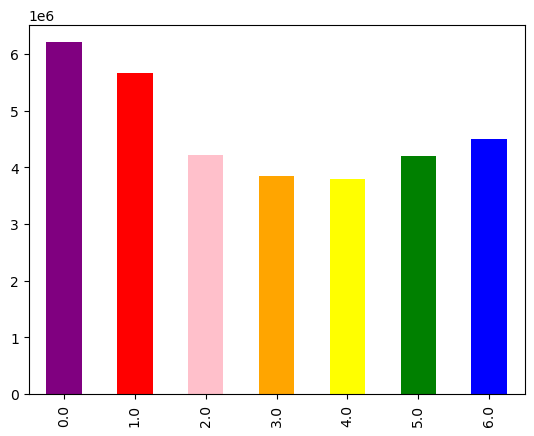

In [13]:
# adding color
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple','red','pink','orange','yellow','green','blue'])

In [14]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

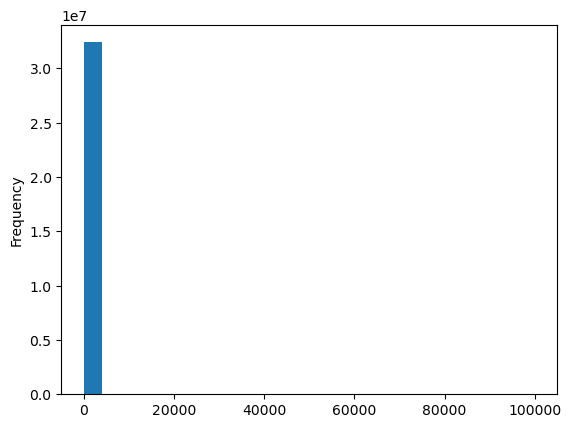

In [15]:
# histogram of prices
ords_prods_merge['prices'].plot.hist(bins = 25)

In [16]:
ords_prods_merge['prices'].describe()

count    3.240487e+07
mean     1.198022e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [18]:
ords_prods_merge['prices'].mean()

11.980224398369746

In [19]:
ords_prods_merge['prices'].median()

7.4

In [20]:
ords_prods_merge['prices'].max()

99999.0

### Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

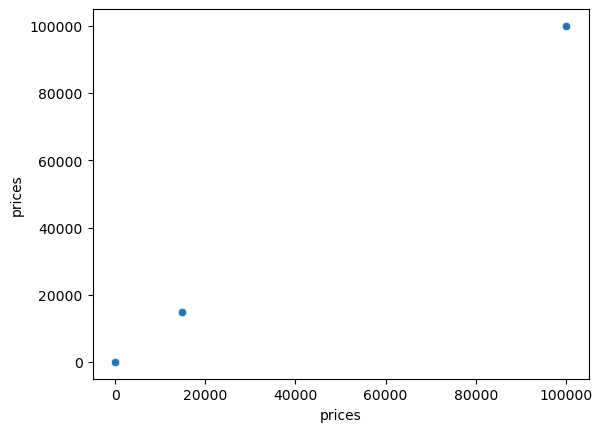

In [21]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [22]:
# checking for outlier
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,Busiest_days,busiest_hours,max_order,loyalty_flag,spending_flag,avg_price,order_frequency,frequency_flag
10030345,912404.0,17.0,12.0,2.0,14.0,5.0,21553,5.0,0.0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,40.0,Frequent customer,High spender,108.648299,5.0,Frequent customer
10030346,603376.0,17.0,22.0,6.0,16.0,4.0,21553,3.0,1.0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,40.0,Frequent customer,High spender,108.648299,5.0,Frequent customer
10030347,3264360.0,135.0,2.0,2.0,21.0,13.0,21553,6.0,0.0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Average orders,4.0,New customer,High spender,1154.792308,12.0,Regular customer
10030348,892534.0,135.0,3.0,0.0,8.0,12.0,21553,3.0,1.0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Busiest days,Average orders,4.0,New customer,High spender,1154.792308,12.0,Regular customer
10030349,229704.0,342.0,8.0,1.0,19.0,30.0,21553,9.0,0.0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,Average orders,16.0,Regular customer,High spender,114.426619,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29194168,2249946.0,204099.0,29.0,0.0,8.0,4.0,33664,1.0,0.0,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Average orders,39.0,Frequent customer,High spender,1106.743956,4.0,Frequent customer
29194169,2363282.0,204099.0,31.0,0.0,9.0,2.0,33664,1.0,1.0,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Average orders,39.0,Frequent customer,High spender,1106.743956,4.0,Frequent customer
29194170,3181945.0,204395.0,13.0,3.0,15.0,8.0,33664,25.0,0.0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Least busy days,Most orders,15.0,Frequent customer,High spender,451.153540,5.0,Frequent customer
29194171,2486215.0,205227.0,7.0,3.0,20.0,4.0,33664,8.0,0.0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Least busy days,Average orders,12.0,Regular customer,High spender,1178.381871,12.0,Regular customer


In [23]:
# mark outliers above 100 as missing
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [24]:
ords_prods_merge['prices'].max()

25.0

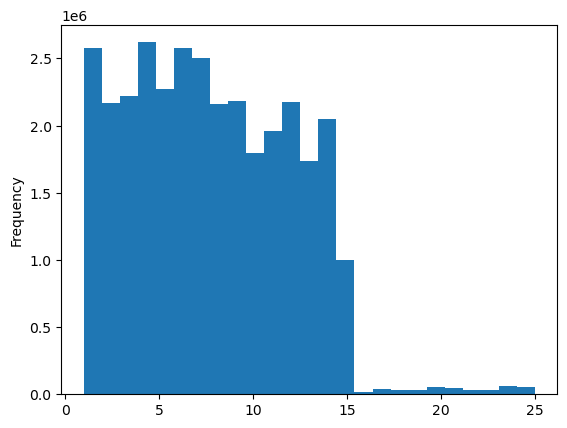

In [25]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

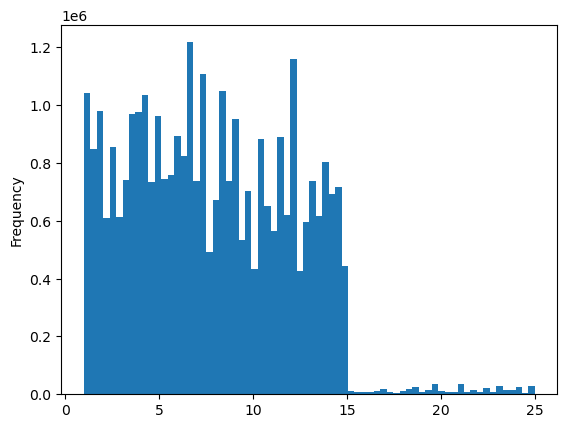

In [26]:
# increasing number of bins
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [27]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))

## Line charts & Sampling

In [28]:
#setting the seed
np.random.seed(4)

In [29]:
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [30]:
dev

array([False,  True, False, ...,  True,  True, False])

In [31]:
np.random.rand(10)

array([0.72334378, 0.45047541, 0.70648241, 0.253538  , 0.20542866,
       0.08812185, 0.60502834, 0.82712983, 0.47498599, 0.93206268])

In [32]:
#storing samples into dfs
big = ords_prods_merge[dev]

In [33]:
small = ords_prods_merge[~dev]

In [35]:
# checking number of rows for consistency
len(ords_prods_merge)

32435070

In [36]:
len(small)+len(big)

32435070

In [37]:
#limiting df to 2 columns
df_2 = small[['orders_day_of_week','prices']]

In [38]:
df_2.head()

,orders_day_of_week,prices
0,2.0,9.0
2,3.0,9.0
3,4.0,9.0
6,1.0,9.0
10,1.0,9.0


In [40]:
df_2.shape

(9729964, 2)

In [41]:
small.shape

(9729964, 24)

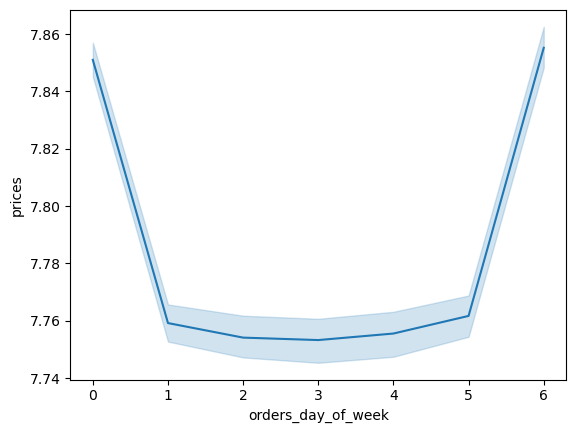

In [42]:
# creating the line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')